# Make figures for paper on geometric images

## Authors:
- **David W. Hogg** (NYU) (MPIA) (Flatiron)
- **Soledad Villar** (JHU)

## To-do items and bugs:
- Plot filters in groups with subplots or equivalent (ie, not just one filter per plot).
- Figure out how to plot 2-tensor filters.
- Figure out which cases need to be plotted.
- Figure out a better way to plot in `D=3`.

In [8]:
import itertools as it
import numpy as np
import geometric as geom
import finufft
import pylab as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
D = 2
group_operators = geom.make_all_operators(D)

In [3]:
geom.test_group(group_operators)

group is closed under multiplication
group operators are the transposes of their inverses


True

In [20]:
filters = {}
names = {}
maxn = {}
for M in [3, 5]:
    maxn[(D, M)] = 0
    for k, parity in it.product((0, 1), (1, -1)):
        key = (D, M, k, parity)
        filters[key] = geom.get_unique_invariant_filters(M, k, parity, D, group_operators)
        n = len(filters[key])
        if n > maxn[(D, M)]:
            maxn[(D, M)] = n
        names[key] = ["{} {}".format(geom.ktensor.name(k, parity), i) for i in range(n)]

/Users/dhogg/miniconda3/lib/python3.9/site-packages/matplotlib/collections.py:981: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


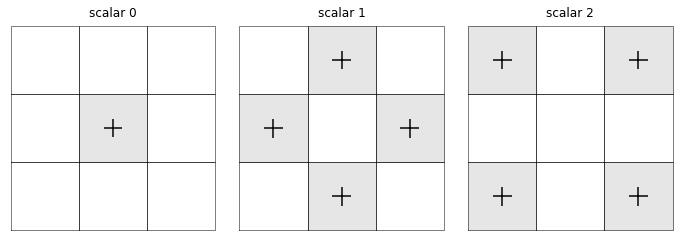

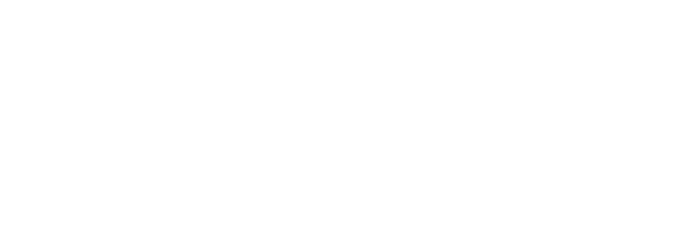

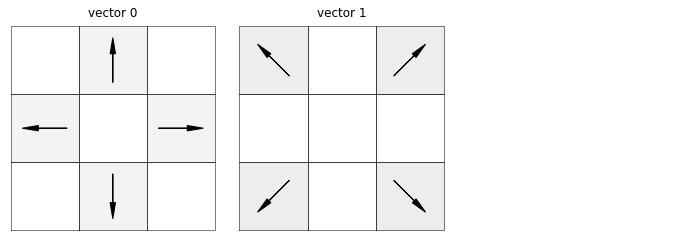

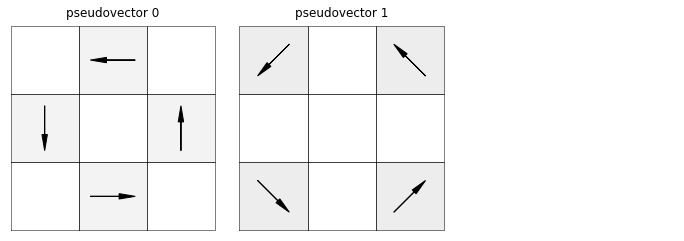

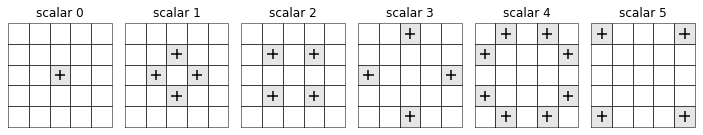

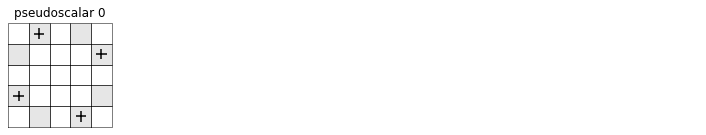

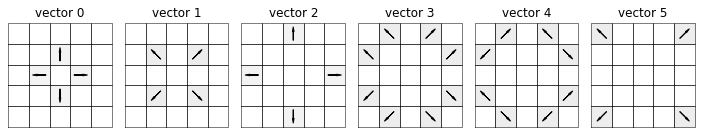

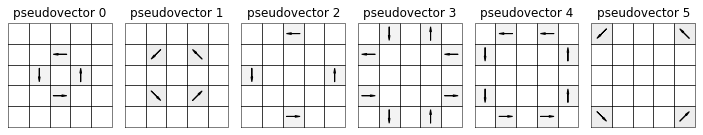

In [44]:
for key in filters.keys():
    D, M, k, parity = key
    fig = geom.plot_filters(filters[key], names[key], maxn[(D, M)])
    plotname = "filter{:+2d}_{}_{}.png".format(parity * k, D, M)
    fig.savefig(plotname, dpi=300)

In [39]:
# make a sensible smooth scalar image on a 2-torus
N = 16
D = 2
np.random.seed(42)
image = np.random.normal(size=D * (N, ))
foo = np.pi * np.arange(-1. + 1. / N, 1., 2. / N)
ys, xs = np.meshgrid(foo, foo) # ys, xs or xs, ys??
ft = finufft.nufft2d1(xs.flatten(), ys.flatten(), image.flatten().astype(complex), (6, 5))
package = finufft.nufft2d2(xs.flatten(), ys.flatten(), ft).reshape(N, N).real
package -= np.mean(package)
package /= np.sqrt(np.mean(package ** 2))
scalar_image = geom.geometric_image(package, 1, D)

In [ ]:
for name, filters in results:
    if name == "scalar":
        s_filters = filters
    if name == "vector":
        v_filters = filters
    if name == "pseudovector":
        pv_filters = filters

sstars = scalar_image.convolve_with(s_filters[1])
sstarv = scalar_image.convolve_with(v_filters[0])
sstarpv = scalar_image.convolve_with(pv_filters[0])

In [ ]:
ax = geom.plot_scalar_image(scalar_image)
plt.title("scalar image")

ax = geom.plot_scalar_image(sstars)
plt.title("scalar image STAR scalar filter")

geom.plot_vector_image(sstarv.normalize().times_scalar(1.5))
plt.title("scalar image STAR vector filter")

geom.plot_vector_image(sstarpv.normalize().times_scalar(1.5))
plt.title("scalar image STAR pseudovector filter")
plt.savefig("foo.png", dpi=300)

In [ ]:
geom.plot_scalar_image((sstarv * sstarpv).contract(0, 1),
                       vmin=-1, vmax=1)
plt.title("this should be zero")